<a href="https://colab.research.google.com/github/nagendra-98/Nagendra-gmail/blob/main/Machine_learning_case_study_1_students_scores_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
 

In [22]:
dataset = pd.read_csv('student_scores.csv')
#read the dataset

In [23]:
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [24]:
dataset.Hours.quantile(0.75)

7.4

In [26]:
dataset.Hours.quantile(0.25)

2.7

In [27]:
iqr = dataset.Hours.quantile(0.75)-dataset.Hours.quantile(0.25)
upper_threshold = dataset.Hours.quantile(0.75)+(1.5*iqr)
lower_threshold = dataset.Hours.quantile(0.25)-(1.5*iqr)
upper_threshold


14.450000000000001

In [28]:
lower_threshold

-4.3500000000000005

In [29]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [32]:
dataset = dataset.drop_duplicates()
#code to delete duplicates
dataset.shape

(25, 2)

In [33]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

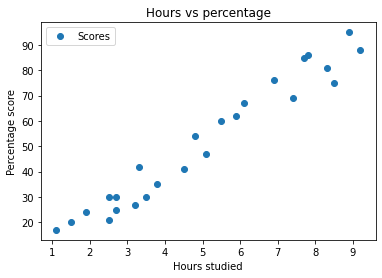

In [37]:
dataset.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

In [39]:
dataset.corr()
#correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [40]:
dataset.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [43]:
a = [1, 2, 3, 4]
a[:-2]
#dataset.iloc[row_criteria, column_criteria]

[1, 2]

In [48]:
x = dataset.loc[:,['Hours']].values
y = dataset.loc[:,'Scores'].values

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 77)

In [50]:
y_test

array([85, 30, 27, 95, 24, 25, 47])

In [51]:
x_train.shape, x_test.shape

((18, 1), (7, 1))

In [52]:
x_test

array([[7.7],
       [2.5],
       [3.2],
       [8.9],
       [1.9],
       [2.7],
       [5.1]])

In [54]:
from sklearn.linear_model import LinearRegression 

In [58]:
regressor = LinearRegression()

In [59]:
regressor.fit (x_train, y_train)

LinearRegression()

In [60]:
print(regressor.intercept_)

4.504335465529486


In [61]:
print(regressor.coef_)

[9.35607676]


In [62]:
regressor.predict([[7.5]])

array([74.67491116])

In [69]:
y_pred = regressor.predict(x_test)
y_pred

array([76.54612651, 27.89452736, 34.44378109, 87.77341862, 22.28088131,
       29.76574271, 52.22032694])

In [72]:
df = pd.DataFrame({'Actual':y_test, 'predicted':y_pred})
df

,Actual,predicted
0,85,76.546127
1,30,27.894527
2,27,34.443781
3,95,87.773419
4,24,22.280881
5,25,29.765743
6,47,52.220327
